In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. 保存したCSVデータを読み込む
df = pd.read_csv('../data/nasa_battery/B0005_summary.csv')


In [3]:
# 2. 基本情報の確認
print("Data Shape:", df.shape)
print(df.head())

Data Shape: (168, 9)
   cycle_id       type  ambient_temperature  capacity  avg_voltage  \
0         2  discharge                 24.0  1.856487     3.529829   
1         4  discharge                 24.0  1.846327     3.537320   
2         6  discharge                 24.0  1.835349     3.543737   
3         8  discharge                 24.0  1.835263     3.543666   
4        10  discharge                 24.0  1.834646     3.542343   

   min_voltage   avg_temp   max_temp  discharge_time  
0     2.612467  32.572328  38.982181        3690.234  
1     2.587209  32.725235  39.033398        3672.344  
2     2.651917  32.642862  38.818797        3651.641  
3     2.592948  32.514876  38.762305        3631.563  
4     2.547420  32.382349  38.665393        3629.172  


Initial Capacity: 1.8565 Ah


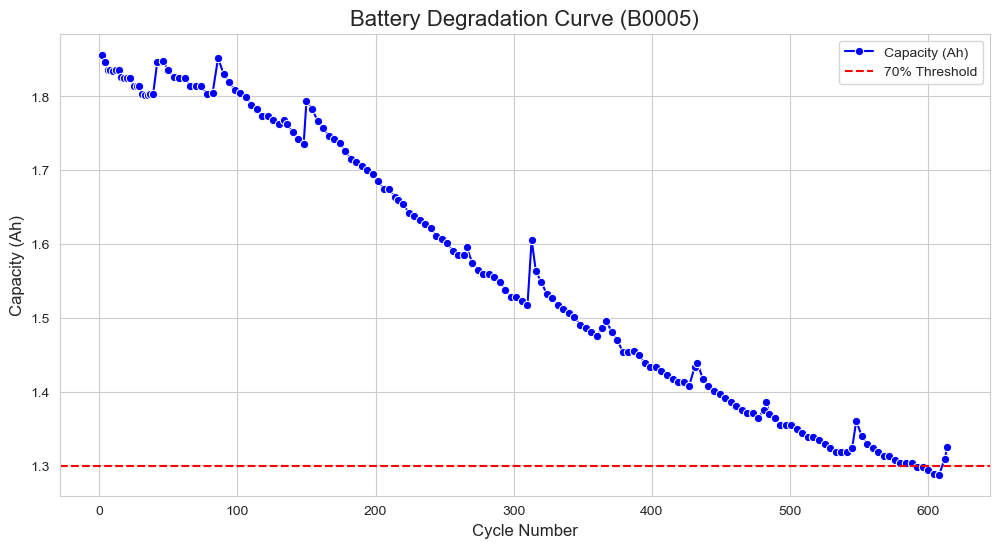

In [4]:
# 3. 劣化曲線（SOH = Capacityの推移）の可視化
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# サイクル数 vs 容量
sns.lineplot(data=df, x='cycle_id', y='capacity', marker='o', color='b', label='Capacity (Ah)')

# 劣化判定ライン（一般的に定格の70-80%と言われるが、この実験では意図的に劣化させている）
# 初期容量を基準に劣化度を表示してみる
initial_capacity = df['capacity'].iloc[0]
print(f"Initial Capacity: {initial_capacity:.4f} Ah")

# 閾値ライン (例: 70%劣化)
threshold = initial_capacity * 0.7
plt.axhline(y=threshold, color='r', linestyle='--', label='70% Threshold')

plt.title('Battery Degradation Curve (B0005)', fontsize=16)
plt.xlabel('Cycle Number', fontsize=12)
plt.ylabel('Capacity (Ah)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



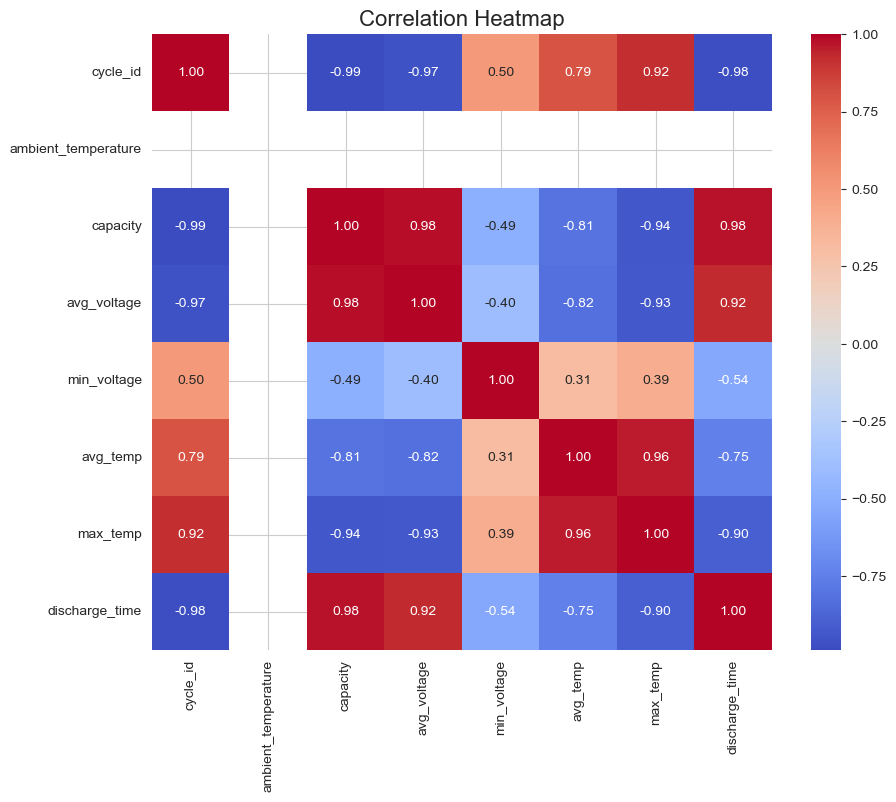

In [6]:
# 4. 相関関係のヒートマップ（特徴量分析）
# 容量（劣化）と相関が高い特徴量はどれか？
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()
